In [76]:
import pandas as pd
import os

In [77]:
binary = pd.read_csv('../data/standardized_data/result_bin_matrix_2019_12_10.csv')

In [78]:
binary.head()

,Rv_ID,PE35_KO_vs_mbio_H37Rv,PPE68_KO_vs_mbio_H37Rv,Rv0950c_KO_vs_CB_WT,Rv0954_KO_vs_RJ_WT,Rv1096_KO_vs_CB_WT,Rv3005c_KO_day32_vs_dejesus_H37Rv_day32,Rv3594_KO_vs_Rubin_FLUTE_WT,Rv3684_KO_vs_CB_WT,Rv3717_KO_vs_Rubin_FLUTE_WT,...,zhang_AA_Rescue_vs_zhang_in_vitro_control_Rescue,zhang_DETA-NO_pH_7.0_vs_zhang_pH_7.0_no_NO_control,zhang_Fe_1.5mM_vs_zhang_Fe_450uM,zhang_Trp_Rescue_vs_zhang_in_vitro_control_Rescue,zhang_Tyloxapol_pH_6.5_vs_zhang_Tyloxapol_pH_4.5,zhang_Tyloxapol_pH_6.5_vs_zhang_pcit_pH_4.5,zhang_mhcii_mouse_d10_vs_zhang_wt_mouse_d10,zhang_mhcii_mouse_d45_vs_zhang_wt_mouse_d45,zhang_wt_mouse_d10_vs_zhang_input_library,zhang_wt_mouse_d45_vs_zhang_input_library
0,Rv0001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Rv0002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Rv0003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Rv0004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Rv0005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
binary=binary.dropna(axis=0)

In [80]:
mbio = pd.read_excel("../data/annotations/DeJesus_mbio.xlsx", header=1)
mbio.head()

,ORF ID,Name,Description,Number of TA Sites,Number of Permissive (P) Sites,Number of Non-Permissive (NP) Sites,Number of Sites Belonging to Essential State,Number of Sites Belonging to Growth-Defect State,Number of Sites Belonging to Non-Essential State,Number of Sites Belonging to Growth-Advantage State,Fraction of Sites with Insertions,Mean Normalized Read-Count At Non-Zero Sites,Final Call
0,Rv0001,dnaA,Chromosomal replication initiator protein DnaA,32,29,3,31,0,1,0,0.125000,45.000000,ES
1,Rv0002,dnaN,DNA polymerase III (beta chain) DnaN (DNA nucl...,31,27,4,31,0,0,0,0.032258,1.000000,ES
2,Rv0003,recF,DNA replication and repair protein RecF (singl...,35,32,3,0,0,35,0,0.857143,38.033333,NE
3,Rv0004,-,hypothetical protein,8,8,0,0,0,8,0,0.375000,144.000000,NE
4,Rv0005,gyrB,DNA gyrase (subunit B) GyrB (DNA topoisomerase...,40,36,4,39,0,1,0,0.025000,26.000000,ES


In [81]:
print(binary.shape)
binary=pd.merge(binary, mbio[['ORF ID', 'Name', 'Description', 'Final Call']], how='left', left_on='Rv_ID', right_on='ORF ID')
print(binary.shape)

(3971, 65)
(3971, 69)


In [82]:
mcbwser = pd.read_excel("../data/annotations/Mycobacterium_tuberculosis_H37Rv_txt_v3.xlsx")
mcbwser.head()

,Refseq_ID,Feature,Rv_ID,Name,Function,Product,Comments,Functional_Category
0,NC_000962.3,CDS,Rv3728,Rv3728,"Unknown, but seems involved in efflux system (...",Probable conserved two-domain membrane protein,"Rv3728, (MTV025.076), len: 1065 aa. Probable c...",cell wall and cell processes
1,NC_000962.3,CDS,Rv3729,Rv3729,Function unknown; probably involved in cellula...,Possible transferase,"Rv3729, (MTV025.077), len: 776 aa. Conserved h...",intermediary metabolism and respiration
2,NC_000962.3,CDS,Rv3730c,Rv3730c,Function unknown,Conserved hypothetical protein,"Rv3730c, (MTV025.078c), len: 346 aa. Conserved...",conserved hypotheticals
3,NC_000962.3,CDS,Rv3760,Rv3760,Unknown,Possible conserved membrane protein,"Rv3760, (MTV025.108), len: 100 aa. Possible co...",cell wall and cell processes
4,NC_000962.3,CDS,Rv3732,Rv3732,Function unknown,Conserved protein,"Rv3732, (MTV025.080), len: 352 aa. Conserved p...",conserved hypotheticals


In [83]:
mcbwser = mcbwser.drop_duplicates(subset=['Rv_ID'])

In [84]:
print(binary.shape)
binary=pd.merge(binary, mcbwser[['Rv_ID', 'Functional_Category']], how='left', on='Rv_ID')
print(binary.shape)

(3971, 69)
(3971, 70)


In [85]:
binary=binary.drop(columns='ORF ID')

In [86]:
desc_columns=['Rv_ID', 'Name', 'Description', 'Final Call', 'Functional_Category']
value_cols=[col for col in binary.columns if col not in desc_columns]
binary=binary[desc_columns + value_cols]

In [87]:
binary[value_cols].sum(axis=1).value_counts()

0.0     2294
1.0      716
2.0      293
3.0      172
4.0      110
6.0       62
5.0       61
7.0       50
8.0       48
9.0       36
10.0      31
11.0      22
12.0      13
13.0      12
16.0      10
14.0       8
15.0       7
19.0       4
22.0       3
20.0       3
17.0       3
24.0       3
18.0       3
21.0       2
30.0       1
27.0       1
26.0       1
25.0       1
29.0       1
dtype: int64

In [88]:
binary['all_zero']=binary.apply(lambda row: 'True' if row[value_cols].sum()==0 else 'False', axis=1)

In [89]:
binary.head()

,Rv_ID,Name,Description,Final Call,Functional_Category,PE35_KO_vs_mbio_H37Rv,PPE68_KO_vs_mbio_H37Rv,Rv0950c_KO_vs_CB_WT,Rv0954_KO_vs_RJ_WT,Rv1096_KO_vs_CB_WT,...,zhang_DETA-NO_pH_7.0_vs_zhang_pH_7.0_no_NO_control,zhang_Fe_1.5mM_vs_zhang_Fe_450uM,zhang_Trp_Rescue_vs_zhang_in_vitro_control_Rescue,zhang_Tyloxapol_pH_6.5_vs_zhang_Tyloxapol_pH_4.5,zhang_Tyloxapol_pH_6.5_vs_zhang_pcit_pH_4.5,zhang_mhcii_mouse_d10_vs_zhang_wt_mouse_d10,zhang_mhcii_mouse_d45_vs_zhang_wt_mouse_d45,zhang_wt_mouse_d10_vs_zhang_input_library,zhang_wt_mouse_d45_vs_zhang_input_library,all_zero
0,Rv0001,dnaA,Chromosomal replication initiator protein DnaA,ES,information pathways,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
1,Rv0002,dnaN,DNA polymerase III (beta chain) DnaN (DNA nucl...,ES,information pathways,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
2,Rv0003,recF,DNA replication and repair protein RecF (singl...,NE,information pathways,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
3,Rv0004,-,hypothetical protein,NE,conserved hypotheticals,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
4,Rv0005,gyrB,DNA gyrase (subunit B) GyrB (DNA topoisomerase...,ES,information pathways,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True


In [90]:
from sklearn.decomposition import PCA
from plotnine import *

In [91]:
pca=PCA(3)
pca_results=pca.fit_transform(binary[value_cols])
explained_var = pca.explained_variance_
pca_df=pd.DataFrame(pca_results, columns=['pca1', 'pca2', 'pca3'])

In [92]:
binary=binary.merge(pca_df, left_index=True, right_index=True)

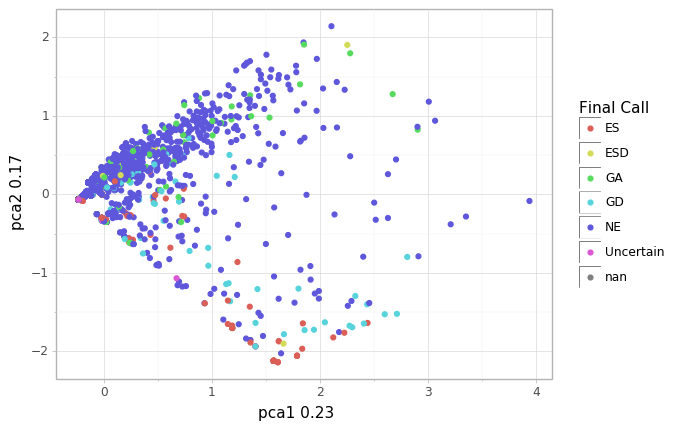

<ggplot: (-9223371901942597972)>

In [93]:
(ggplot(binary, aes(x='pca1', y='pca2', color='Final Call')) 
 + geom_point() 
 + theme_light() 
 + xlab(f'pca1 {np.round(explained_var[0], 2)}') 
 + ylab(f'pca2 {np.round(explained_var[1], 2)}')
)

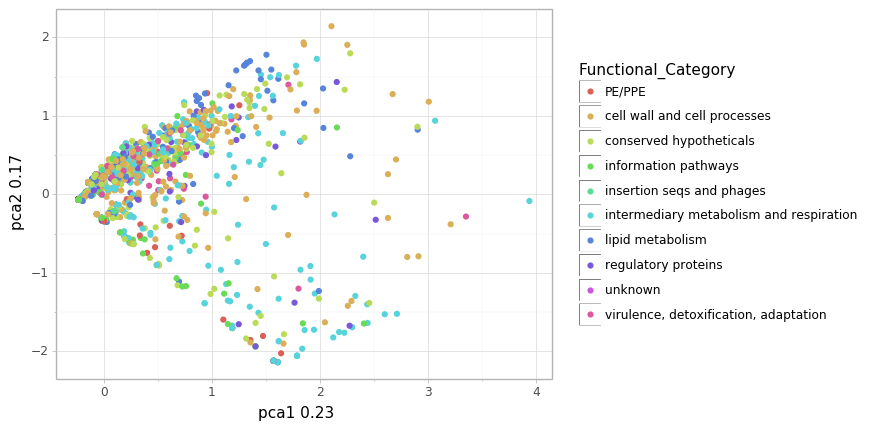

<ggplot: (-9223371901937740498)>

In [94]:
(ggplot(binary, aes(x='pca1', y='pca2', color='Functional_Category'))
 +geom_point()
 +theme_light()
 +xlab(f'pca1 {np.round(explained_var[0], 2)}')
 +ylab(f'pca2 {np.round(explained_var[1], 2)}'))

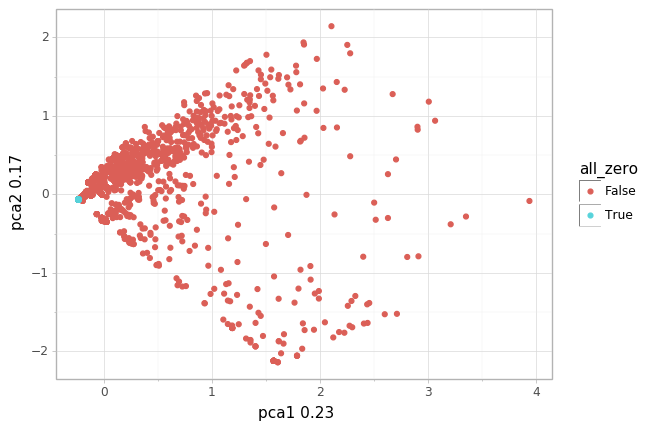

<ggplot: (-9223371901942330964)>

In [95]:
(ggplot(binary, aes(x='pca1', y='pca2', color='all_zero'))
 +geom_point()
 +theme_light()
 +xlab(f'pca1 {np.round(explained_var[0], 2)}')
 +ylab(f'pca2 {np.round(explained_var[1], 2)}'))

In [96]:
from sklearn.manifold import TSNE

In [97]:
tsne = TSNE(n_components=2).fit_transform(binary[value_cols])

In [98]:
tsne = pd.DataFrame(tsne, columns=['tsne1', 'tsne2'])

In [99]:
binary=binary.merge(tsne, left_index=True, right_index=True)

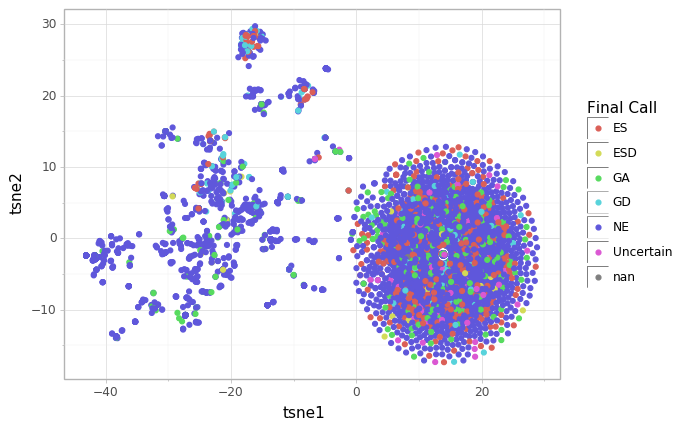

<ggplot: (134912523093)>

In [100]:
(ggplot(binary, aes(x='tsne1', y='tsne2', color='Final Call'))+geom_point()+theme_light())

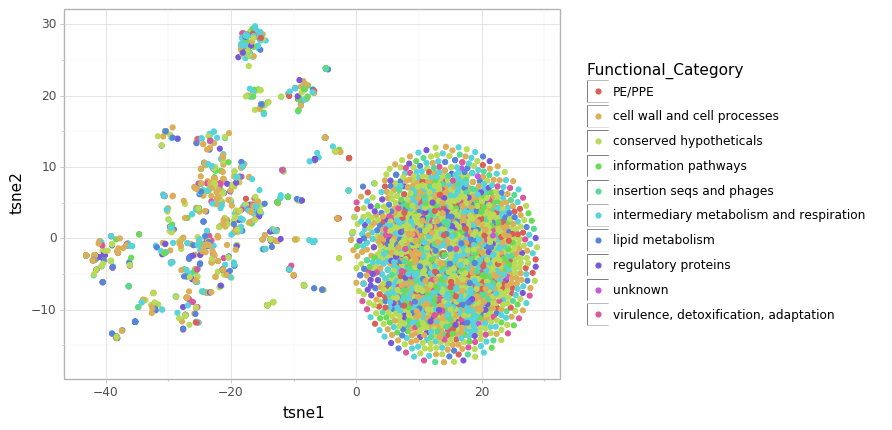

<ggplot: (134912194045)>

In [101]:
(ggplot(binary, aes(x='tsne1', y='tsne2', color='Functional_Category'))+geom_point()+theme_light())

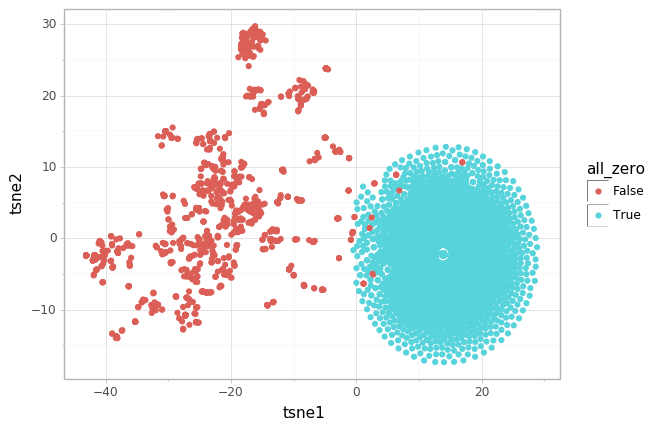

<ggplot: (134912204776)>

In [102]:
(ggplot(binary, aes(x='tsne1', y='tsne2', color='all_zero'))+geom_point()+theme_light())

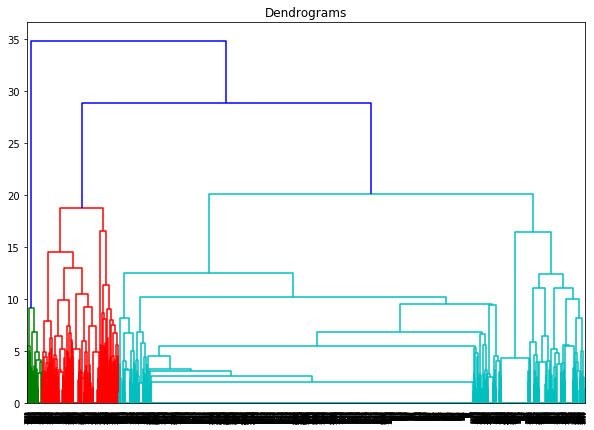

In [27]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(binary[value_cols], method='ward'))

In [28]:
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage ='ward')
y_hc=hc.fit_predict(binary[value_cols])

In [29]:
binary['y_hc']=y_hc

In [30]:
binary

,Rv_ID,Name,Description,Final Call,Functional_Category,PE35_KO_vs_mbio_H37Rv,PPE68_KO_vs_mbio_H37Rv,Rv0950c_KO_vs_CB_WT,Rv0954_KO_vs_RJ_WT,Rv1096_KO_vs_CB_WT,...,zhang_mhcii_mouse_d10_vs_zhang_wt_mouse_d10,zhang_mhcii_mouse_d45_vs_zhang_wt_mouse_d45,zhang_wt_mouse_d10_vs_zhang_input_library,zhang_wt_mouse_d45_vs_zhang_input_library,pca1,pca2,pca3,tsne1,tsne2,y_hc
0,Rv0001,dnaA,Chromosomal replication initiator protein DnaA,ES,information pathways,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.017808,-0.332904,-0.021678,-10.609727,-10.333232,1
1,Rv0002,dnaN,DNA polymerase III (beta chain) DnaN (DNA nucl...,ES,information pathways,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.234456,-0.067213,-0.069659,-0.549779,13.577432,1
2,Rv0003,recF,DNA replication and repair protein RecF (singl...,NE,information pathways,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.100854,0.320011,0.001618,14.672546,-22.908453,2
3,Rv0004,-,hypothetical protein,NE,conserved hypotheticals,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.234456,-0.067213,-0.069659,-0.635718,13.608521,1
4,Rv0005,gyrB,DNA gyrase (subunit B) GyrB (DNA topoisomerase...,ES,information pathways,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.234456,-0.067213,-0.069659,-0.581908,13.572904,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3966,Rv3920c,-,Conserved protein similar to jag protein,NE,conserved hypotheticals,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.021783,-0.222921,-0.541199,-1.829518,-16.489204,0
3967,Rv3921c,-,Probable conserved transmembrane protein,ESD,cell wall and cell processes,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.234456,-0.067213,-0.069659,7.814280,24.675335,1
3968,Rv3922c,-,Possible hemolysin,NE,"virulence, detoxification, adaptation",0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.018940,-0.001782,-0.225437,-7.506970,-25.641951,0
3969,Rv3923c,rnpA,Ribonuclease P protein component RnpA (RNaseP ...,NE,information pathways,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.234456,-0.067213,-0.069659,2.979407,10.673600,1


C:\Users\light\Anaconda3\lib\site-packages\plotnine\stats\stat.py:311: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  stats = pd.concat(stats, axis=0, ignore_index=True)


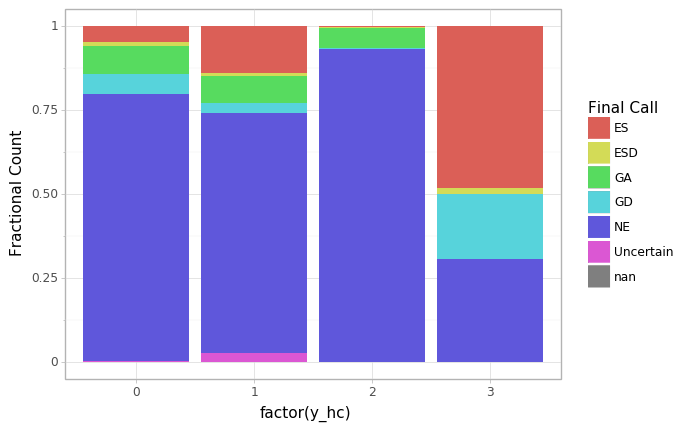

<ggplot: (-9223371901937986272)>

In [31]:
(ggplot(binary, aes(x='factor(y_hc)'))+geom_bar(aes(fill='Final Call'), position='fill')+theme_light()+ylab('Fractional Count'))

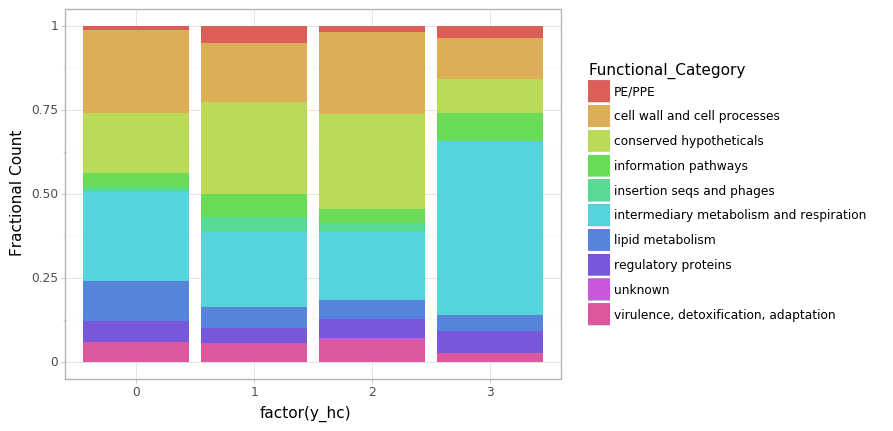

<ggplot: (-9223371901937984396)>

In [32]:
(ggplot(binary, aes(x='factor(y_hc)'))+geom_bar(aes(fill='Functional_Category'), position='fill')+theme_light()+ylab('Fractional Count'))

In [33]:
binary.to_csv('results/clustering_binary_genes.csv', index=False)

0.0     2294
1.0      716
2.0      293
3.0      172
4.0      110
6.0       62
5.0       61
7.0       50
8.0       48
9.0       36
10.0      31
11.0      22
12.0      13
13.0      12
16.0      10
14.0       8
15.0       7
19.0       4
22.0       3
20.0       3
17.0       3
24.0       3
18.0       3
21.0       2
30.0       1
27.0       1
26.0       1
25.0       1
29.0       1
dtype: int64